In [1]:
#분석
import pandas as pd
import numpy as  np
import random as rnd

In [2]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

### 데이터 불러오기

- Survival 생존여부 0=No 1=Yes
- pclass 사회-경제적지위 1=1st, 2=2nd, 3=3rd
- sex : 성별
- Age : 나이
- sibsp : 타이타닉호에 탑승한 형제-자매 수
- parch ; 타이타닉호에 탑승한 부모-자녀 수
- ticket : 티켓번호
- fare : 탑승 요금
- cabin : 방번호
- embarked : 탑승 지역(항구 위치)
C = Cherbourg,
  Q = Queenstown,
S = Southampton

### EDA

1. 데이터의 열 별 정보를 확인 (결측치 확인)
2. 변수간 상관관계 확인
3. 변수 별 분포 확인

In [4]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#결측값 확인.
print(train_df.isnull().sum())
print(train_df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

#### 데이터 상관관계 확인

In [9]:
#선실별 사회적지위를 통해 생존율 확인.
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [10]:
 #pclass가 좋을 수록 survived 확률이 높음
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
#성별에 따른 생존 여부
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [74]:
#pclass 높을 수록 fare 도 높아짐
train_df.groupby('Pclass')['Fare'].median() 

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [75]:
train_df.groupby('Pclass')['Age'].median() #pclass 가 높을 수록 age 도 높아짐

Pclass
1    36.0
2    30.0
3    27.0
Name: Age, dtype: float64

In [76]:
#pclass가 좋을 수록 survived 확률이 높음, pclass=3은 대부분 못살았음
train_df.groupby('Pclass')['Survived'].mean() 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [12]:
# 상관관계 분석
train_df.corr() 
#pclass와 survived 값이 -0.34 로 음의 상관관계가 어느정도로 있는 것으로 확인 (?)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### 시각화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

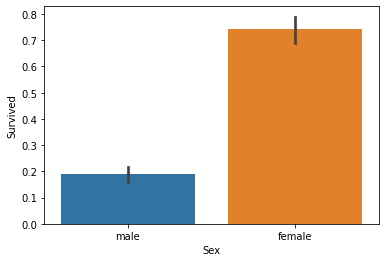

In [13]:
#성별로 남 여 데이터 확인.
sns.barplot(x="Sex", y="Survived", data=train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

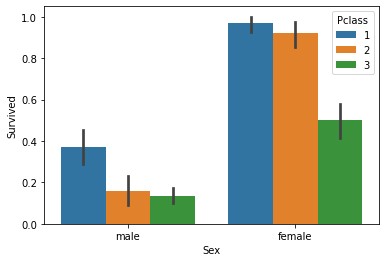

In [14]:
# 성별과 선실에 따른 생존여부 확인.
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

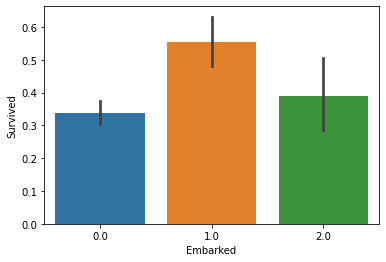

In [77]:
# 선착지에에 따른 생존여부 확인.
sns.barplot(x='Embarked', y='Survived', data=train_df)
#Southampton이 생존율이 제일 낮은 것을 확인.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

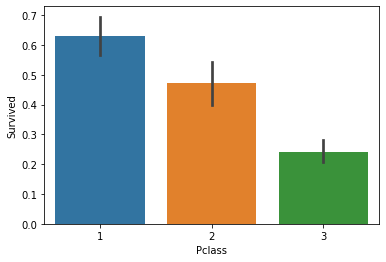

In [78]:
sns.barplot(x='Pclass', y='Survived', data=train_df) #위에 따른 시각화

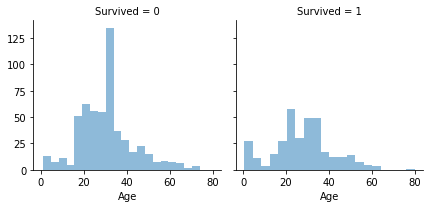

In [80]:
# 전반적으로 어린아이들이 많이 살았음
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show() 

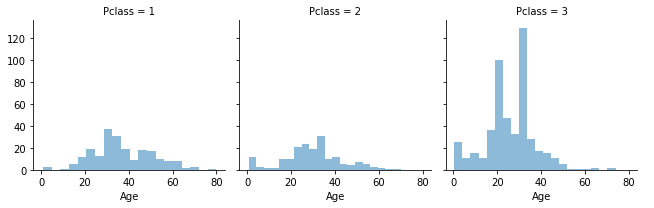

In [81]:
# 각 pclass는 나이 분포가 다양함
grid = sns.FacetGrid(train_df, col='Pclass')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show() 

<AxesSubplot:>

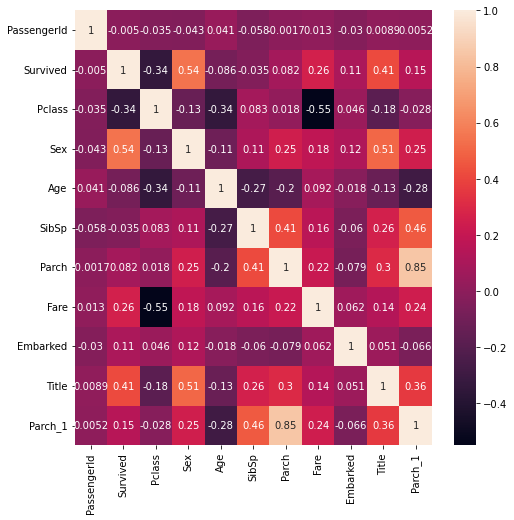

In [58]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=train_df.corr(), annot=True)

#### 전처리

##### Age 전처리

In [15]:
# Title 변수 생성

train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [16]:
name_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4, "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 } 

x_data_test = [train_df]
for dataset in x_data_test : 
    dataset['Title'] = dataset['Title'].map(name_mapping) 

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [17]:
train_df.groupby(['Title']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
0,454.499033,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560
1,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873
2,453.160000,0.792000,2.000000,35.898148,0.696000,0.832000,45.138533
3,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
4,546.259259,0.444444,1.333333,42.384615,0.296296,0.074074,39.111422


In [18]:
# Age 결측값에 Title에 따른 평균값 넣음

train_df.loc[(train_df.Age.isnull())&(train_df.Title==0),'Age']=32
train_df.loc[(train_df.Age.isnull())&(train_df.Title==1),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Title==2),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Title==3),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Title==4),'Age']=30

In [19]:
train_df['Parch_1'] = 1
train_df.loc[train_df['Parch']==0, 'Parch_1']=0

train_df[['Parch_1', 'Survived']].groupby(['Parch_1'], as_index=False).mean()

,Parch_1,Survived
0,0,0.343658
1,1,0.511737


##### Sex 전처리

In [20]:
# male 값 : 0 female 값: 1로 설정 
train_df['Sex'] = train_df['Sex'].map({'male':0,
                                       'female':1})

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Parch_1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,4,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,0,0


##### Embarked 전처리

In [21]:
# Southampton:0, Cherbourg:1, Queenstonw:2
train_df['Embarked'] = train_df['Embarked'].map({'S':0,
                                                'C':1,
                                                'Q':2})

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Parch_1
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0,4,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,NaN,0.0,1,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0,0,0


In [22]:
#Embarked 결측치 2개니까 삭제 or 중앙값 대체.
#train_df = train_df.dropna()
train_df['Embarked'].fillna(train_df["Embarked"].median(), inplace=True)

In [23]:
#유니크 값 확인.
train_df['Embarked'].unique()

array([0., 1., 2.])

In [ ]:
# Cabin, Ticket 드랍예정

##### 결측값 확인

In [24]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Parch_1          0
dtype: int64


In [73]:
#드랍할 칼럼 확인.
#Cabin은 결측치가 너무 많으므로 drop
drop_column = ['Name', 'Cabin',,'Ticket','Fare']

for dataset in train_test_data:
    dataset = dataset.drop(drop_column, axis=1, inplace=True)

SyntaxError: EOL while scanning string literal (Temp/ipykernel_21520/4130551058.py, line 3)

##### 모델링 전 확인

In [37]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Parch_1'],
      dtype='object')

In [63]:
sds = StandardScaler()
# 쓸 변수 안 쓸 변수 정하기.
numeric_columns = ['Pclass', 'Age', 'Parch', 'Fare','Sex','Embarked']

train_df_norm = sds.fit_transform(train_df[numeric_columns])

In [64]:
train_df_norm.shape

(891, 6)

### 모델링

1. Logistic Regression (로지스틱 회귀)
2. Decision Tree (의사결정 나무)
3. Random Forest (랜덤포레스트)
4. XGBoost (XGBoost)

In [65]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
model_rf = RandomForestClassifier(n_estimators = 8, random_state = 0)
model_xgb = xgb.XGBClassifier()

### 학습

1. 데이터를 학습, 검증데이터로 분리해주세요 !
2. 학습데이터에서 독립변수와 종속변수와를 구분하고 모델을 학습시켜주세요.
3. 검증데이터로 점수를 확인해보세요 !  
    3-1. 랜덤포레스트, XGBoost는 Feature Importance도 확인해주세요 !
4. 하이퍼파라미터 튜닝을 해보세요.
    - GridSeacrCV

In [66]:
train_x, valid_x, train_y, valid_y = train_test_split(train_df[numeric_columns], train_df['Survived'], 
                                                        test_size=0.2, shuffle=True)

In [67]:
model_lr.fit(train_x, train_y)
model_dt.fit(train_x, train_y)
model_rf.fit(train_x, train_y)
model_xgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
model_lr.fit(train_x, train_y)

LogisticRegression()

In [69]:
#Linear Regression
print('train score : {:.3f}'.format(model_lr.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_lr.score(valid_x, valid_y)))

train score : 0.791
test socre : 0.782


In [70]:
#Decision Ttree
print('train score : {:.3f}'.format(model_dt.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_dt.score(valid_x, valid_y)))

train score : 0.788
test socre : 0.782


In [71]:
#Random Forest
print('train score : {:.3f}'.format(model_rf.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_rf.score(valid_x, valid_y)))

train score : 0.969
test socre : 0.799


In [72]:
#XGB
print('train score : {:.3f}'.format(model_xgb.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_xgb.score(valid_x, valid_y)))

train score : 0.969
test socre : 0.827


### 추론

In [36]:
test_df = pd.read_csv(f"./test.csv", index_col=0)

print(test_df.isnull().sum())
print(test_df.info())

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


In [40]:
# Title 변수 생성

test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

name_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4, "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 } 

x_data_test = [test_df]
for dataset in x_data_test : 
    dataset['Title'] = dataset['Title'].map(name_mapping) 

# Age 결측값에 Title에 따른 평균값 넣음

test_df.loc[(test_df.Age.isnull())&(test_df.Title==0),'Age']=32
test_df.loc[(test_df.Age.isnull())&(test_df.Title==1),'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df.Title==2),'Age']=36
test_df.loc[(test_df.Age.isnull())&(test_df.Title==3),'Age']=5
test_df.loc[(test_df.Age.isnull())&(test_df.Title==4),'Age']=30

test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})
test_df['Embarked'] = test_df['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_df['Fare'].fillna(test_df["Fare"].median(), inplace=True)

In [41]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,2
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",0,32.0,0,0,A.5. 3236,8.0500,NaN,0,0
1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,4
1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0


In [49]:
y_pred = model_lr.predict(test_df[numeric_columns])

In [50]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
df_submission = pd.read_csv(f"./submission.csv")
df_submission['Survived'] = y_pred
df_submission.to_csv('submission_1.csv', index=False)